# Analyze the Document Term Matrix

This notebook continues our analysis of document similarity based on shared entries.

Note: This notebook uses the R Kernel. See `03_analyze_sections.ipynb` for further instructions concerning installing the R kernel and loading libraries.

In [1]:
# To load libraries in the R kernel in Jupyter Notebooks, you need to know
# where your Jupyter Notebook is looking for libraries (the library path).
# Often, there will be two locations where R libraries are installedf. 
# You can find all of these locations by running the following command.
.libPaths()

[1] "/anaconda/lib/R/library"

In [2]:
# set the variable `lib.dir` to one of your library paths
lib.dir = '/anaconda/lib/R/library'

In [3]:
# load libraries for packages used in this notebook
library(ggplot2, lib.loc = lib.dir)
library(ggdendro, lib.loc = lib.dir)
library(reshape, lib.loc = lib.dir)
library(scales, lib.loc = lib.dir)

# Note, you need to install these packages first. If you haven't already
# done that, see `03_analyze_sections.ipynb`. 

# Note to Erin
I have hard-coded the file `Q39_par_dtm.csv` here - should give the user a choice.

# Note to Niek 
Unfortunately, the interactive input function for R doesn't work in Jupyter Notebook. Another thing for our 10 tips paper I guess.

In [4]:
# Provide a filename. 
# This doesn't work yet. readline() isn't interactive in Jupyter Notebook!
# filename = readline(prompt = "Filename: ")

In [5]:
# Read in dtm from file output by previous notebook.
dtm_df = read.csv('../data/pass/Q39_par_dtm.csv', 
                  stringsAsFactors = F, row.names = 1) 

## Check how R parsed the DTM 
- R doesn't allow variable names to start with a number. Entries starting with a number had "X" added to the beggining of the entry name.  
- R doesn't allow parentheses or brackets in variable names, so entries like "1(ban₂)[na]na" parsed as "X1.ban...na.na".   

In a later cell, we will sum the columns and rows to get an idea of the
density of the matrix. In order to avoid iteratively summing the summary 
column and summary row, we need to set variables specifying the 
columns and rows we want to sum. This needs to be a separate cell from
the cell in which we actually do the summing.

In [6]:
cols_to_sum = ncol(dtm_df)
rows_to_sum = nrow(dtm_df)

head(dtm_df)
dim(dtm_df) 
# The call to dim should not change if you run this cell multiple times. 
# If it does, there is a problem.

,X1.2.na.na_giŋ.unit.n,X5.6.na.na_sila.unit.n,a.arm.n_apin.plow.n,a.arm.n_diš.na.na,a.arm.n_gud.ox.n_apin.plow.n,a.arm.n_umbin.wheel.n_margida.cart.n,a.arm.n_ŋešrin.scales.n,ab.cow.n,ab.cow.n_ib.hips.n_gig.sick.v.i,ab.cow.n_mah.mature.v.i,⋯,šuʾa.stool.n_burgul.stone.cutter.n,šuʾa.stool.n_dus.bathroom.n,šuʾa.stool.n_kaskal.way.n,šuʾa.stool.n_nagar.carpenter.n,šuʾa.stool.n_niŋgula.greatness.n,šuʾa.stool.n_suhsah.sound.n,šuʾa.stool.n_tibira.sculptor.n,šuʾa.stool.n_x.na.na,šuʾa.stool.n_šu.hand.n,šuʾa.stool.n_šuʾi.barber.n
P224980,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224986,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224994,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P224996,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P225006,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
P225023,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1]   71 2976

## Check density of DTM

Look at distribution of document lengths (number of entries per document).  
Also look at distribution of entry frequency (number of documents each entry appears in).

In [7]:
# Add a column showing the number of entries in each document.
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])

# Add a row showing the number of occurances of each entry.
dtm_df["num_occurances",] = colSums(dtm_df[1:rows_to_sum,])

# The intersection of these two summaries is meaningless, set to NA.
dtm_df["num_occurances","num_entries"] = NA 

[1] "There are 36 documents with 10 or more entries."
[1] "There are 18 documents with 100 or more entries."


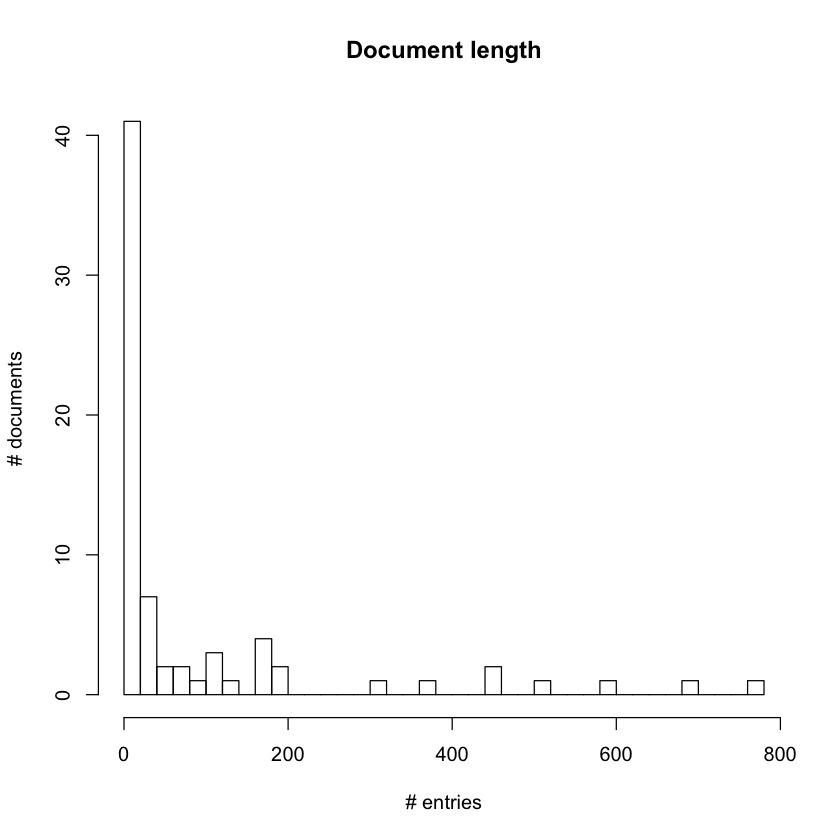

In [8]:
hist(dtm_df$num_entries, breaks = 30, main = "Document length", 
    ylab = "# documents", xlab = "# entries")

# Print out some summary statements.
print(paste("There are", length(which(dtm_df$num_entries >= 10)), "documents with 10 or more entries."))
print(paste("There are", length(which(dtm_df$num_entries >= 100)), "documents with 100 or more entries."))

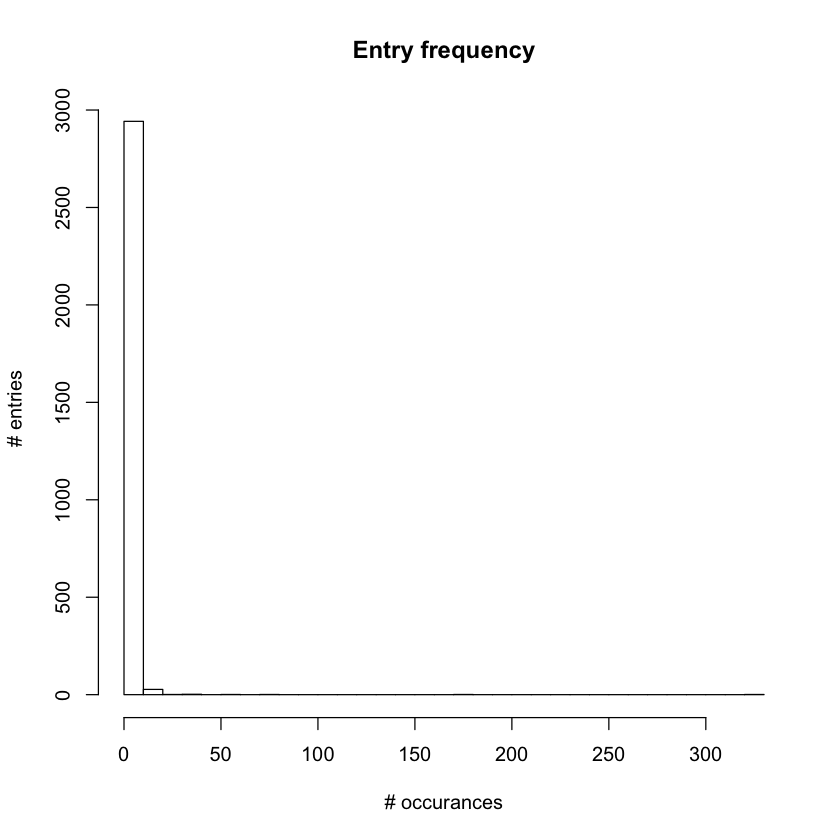

[1] "79.33% of entries appear only once or twice across the corpus"
[1] "47 entries occur in 10 or more documents"
[1] "including one that occurs 326 times across the 71 documents"
[1] "The most common entry is unknown"


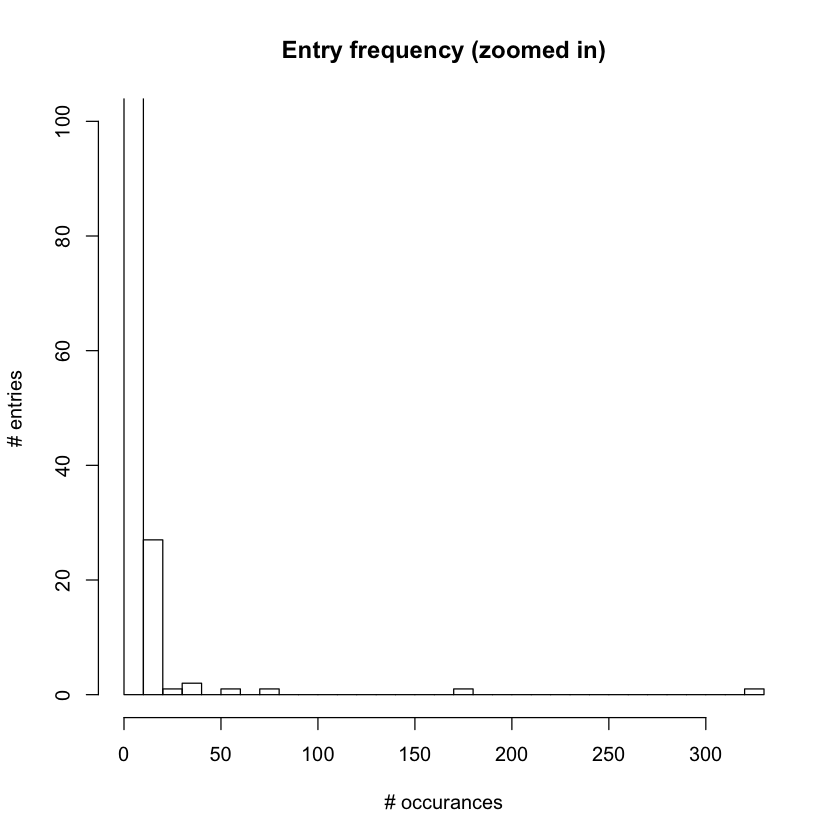

In [9]:
num_occurances = unlist(dtm_df["num_occurances",])
hist(num_occurances, breaks = 30, main = "Entry frequency", 
    ylab = "# entries", xlab = "# occurances")
hist(num_occurances, breaks = 30, ylim = c(0, 100), 
     main = "Entry frequency (zoomed in)", 
    ylab = "# entries", xlab = "# occurances")

rare = round(length(which(dtm_df["num_occurances",] <=2))/cols_to_sum*100,2)
common_entries = colnames(dtm_df[which(dtm_df["num_occurances",] >=10)])
most_common = max(dtm_df["num_occurances",], na.rm = TRUE)
most_common_entry = colnames(dtm_df[which(dtm_df["num_occurances",] == most_common)])

print(paste0(rare, "% of entries appear only once or twice across the corpus"))
print(paste(length(common_entries), "entries occur in 10 or more documents"))
print(paste("including one that occurs", most_common, "times across the", rows_to_sum, "documents"))
print(paste("The most common entry is", most_common_entry))

Here we inspect the most common entries (those that appear at least ten times across the corpus) to see if they make sense.

In [10]:
# Look at some of the most common entries
common_entries

[1] "al.hoe.n"                        "allanum.oak.n"                  
 [3] "apin.plow.n_tugsaga.plow.n"      "apin.plow.n_šu.hand.n"          
 [5] "apin.plow.n_šudu.equipped.aj"    "buniŋ.trough.n_x.na.na"         
 [7] "dilim.spoon.n"                   "e.house.n_gigir.chariot.n"      
 [9] "esi.tree.n"                      "gigir.chariot.n"                
[11] "girim.flower.n"                  "guza.chair.n_x.na.na"           
[13] "hašhur.apple.n"                  "hašhur.apple.n_kur.mountain.n"  
[15] "ildag.poplar.n"                  "ildag.poplar.n_kur.mountain.n"  
[17] "ilianum.tree.n"                  "kid.da.twig.n"                  
[19] "ligima.shoot.n"                  "ma.ship.n_u.ten.nu_gur.unit.n"  
[21] "ma.ship.n_x.na.na"               "manu.wood.n"                    
[23] "margida.cart.n"                  "mes.tree.n"                     
[25] "peš.fig.n"                       "tiʾarum.tree.n"                 
[27] "unknown"                         "urnum.cedar.n"                  
[29] "x.x.na.na"                       "x.na.na"                        
[31] "x.na.na_margida.cart.n"          "x.na.na_ŋešnimbar.palm.n"       
[33] "X.ŋeš.x.x.x.na.na"               "X.ŋeš.x.x.na.na"                
[35] "X.ŋeš.x.na.na"                   "X.ŋeš.x.na.na_x.na.na"          
[37] "ŋešgana.tree.n_babbar.white.v.i" "ŋešnimbar.palm.n"               
[39] "ŋešnimbar.palm.n_x.x.na.na"      "ŋešnimbar.palm.n_x.na.na"       
[41] "ŋeštin.vine.n"                   "ŋeštinguruma..vine.n"           
[43] "ŋeštinkaʾa.grape.n"              "ŋeštinkira.berry.n"             
[45] "ŋipar.tree.n"                    "šagkal.tree.n"                  
[47] "šennur.plum.n"

As seen from the output above, many of the most common entries include
either unlematizable or illegible words (represented as x.x.na.na). 
These are not particularly informative. We want to remove these entries from the analysis. Also remove the entry "unknown".

In [11]:
# remove na.na entries
entries_with_na = grep("na.na", colnames(dtm_df))

if(length(entries_with_na) > 0) {
dtm_df = dtm_df[,-entries_with_na]
dtm_df$unknown = NULL
    }

head(dtm_df)

,a.arm.n_apin.plow.n,a.arm.n_gud.ox.n_apin.plow.n,a.arm.n_umbin.wheel.n_margida.cart.n,a.arm.n_ŋešrin.scales.n,ab.cow.n,ab.cow.n_ib.hips.n_gig.sick.v.i,ab.cow.n_mah.mature.v.i,ab.cow.n_peš.thick.v.i,ab.cow.n_si.horn.n_ŋal.be.v.i,ab.cow.n_suhub..oxen.n,⋯,šuʾa.stool.n_burgul.stone.cutter.n,šuʾa.stool.n_dus.bathroom.n,šuʾa.stool.n_kaskal.way.n,šuʾa.stool.n_nagar.carpenter.n,šuʾa.stool.n_niŋgula.greatness.n,šuʾa.stool.n_suhsah.sound.n,šuʾa.stool.n_tibira.sculptor.n,šuʾa.stool.n_šu.hand.n,šuʾa.stool.n_šuʾi.barber.n,num_entries
P224980,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
P224986,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
P224994,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
P224996,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
P225006,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3
P225023,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,3


Look again at entry frequency after removing these entries.

In [12]:
# Remove summary column and row
dtm_df$num_entries = NULL
dtm_df = dtm_df[-which(rownames(dtm_df) == "num_occurances"),]

cols_to_sum = ncol(dtm_df)
rows_to_sum = nrow(dtm_df)

In [13]:
# Add a column showing the number of entries in each document.
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])

# Add a row showing the number of occurances of each entry.
dtm_df["num_occurances",] = colSums(dtm_df[1:rows_to_sum,])

# The intersection of these two summaries is meaningless, set to NA.
dtm_df["num_occurances","num_entries"] = NA 

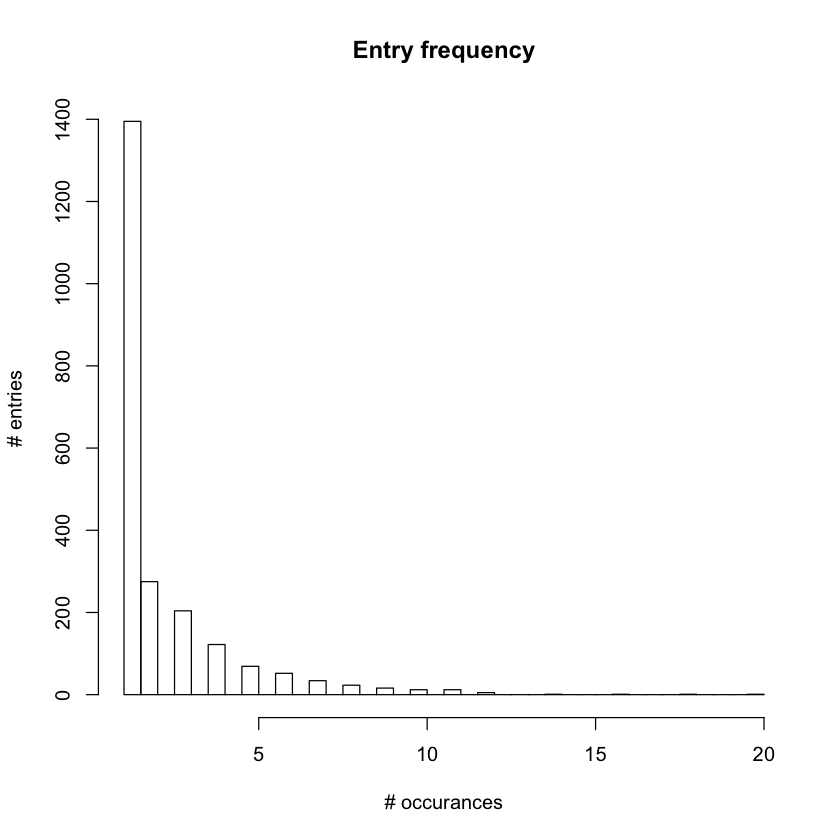

[1] "75.12% of entries appear only once or twice across the corpus"
[1] "33 entries occur in 10 or more documents"
[1] "including one that occurs 20 times across the 71 documents"
[1] "The most common entry is apin.plow.n_šudu.equipped.aj"


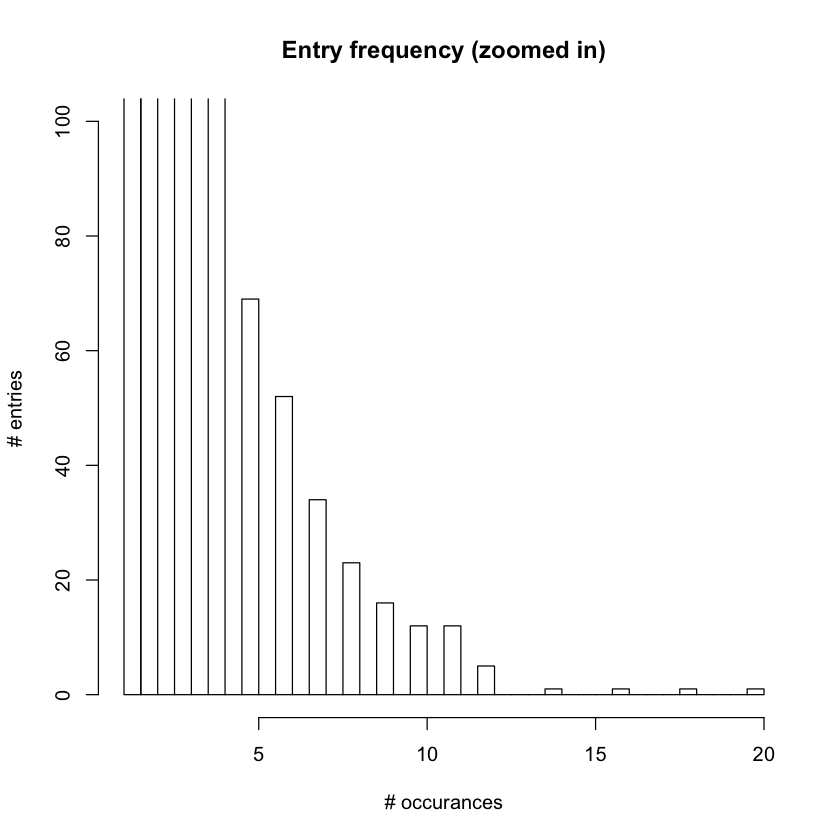

In [14]:
num_occurances = unlist(dtm_df["num_occurances",])
hist(num_occurances, breaks = 30, main = "Entry frequency", 
    ylab = "# entries", xlab = "# occurances")
hist(num_occurances, breaks = 30, ylim = c(0, 100), 
     main = "Entry frequency (zoomed in)", 
    ylab = "# entries", xlab = "# occurances")

rare = round(length(which(dtm_df["num_occurances",] <=2))/cols_to_sum*100,2)
common_entries = colnames(dtm_df[which(dtm_df["num_occurances",] >=10)])
most_common = max(dtm_df["num_occurances",], na.rm = TRUE)
most_common_entry = colnames(dtm_df[which(dtm_df["num_occurances",] == most_common)])

print(paste0(rare, "% of entries appear only once or twice across the corpus"))
print(paste(length(common_entries), "entries occur in 10 or more documents"))
print(paste("including one that occurs", most_common, "times across the", rows_to_sum, "documents"))
print(paste("The most common entry is", most_common_entry))

In [15]:
common_entries

[1] "al.hoe.n"                        "allanum.oak.n"                  
 [3] "apin.plow.n_tugsaga.plow.n"      "apin.plow.n_šu.hand.n"          
 [5] "apin.plow.n_šudu.equipped.aj"    "dilim.spoon.n"                  
 [7] "e.house.n_gigir.chariot.n"       "esi.tree.n"                     
 [9] "gigir.chariot.n"                 "girim.flower.n"                 
[11] "hašhur.apple.n"                  "hašhur.apple.n_kur.mountain.n"  
[13] "ildag.poplar.n"                  "ildag.poplar.n_kur.mountain.n"  
[15] "ilianum.tree.n"                  "kid.da.twig.n"                  
[17] "ligima.shoot.n"                  "ma.ship.n_u.ten.nu_gur.unit.n"  
[19] "manu.wood.n"                     "margida.cart.n"                 
[21] "mes.tree.n"                      "peš.fig.n"                      
[23] "tiʾarum.tree.n"                  "urnum.cedar.n"                  
[25] "ŋešgana.tree.n_babbar.white.v.i" "ŋešnimbar.palm.n"               
[27] "ŋeštin.vine.n"                   "ŋeštinguruma..vine.n"           
[29] "ŋeštinkaʾa.grape.n"              "ŋeštinkira.berry.n"             
[31] "ŋipar.tree.n"                    "šagkal.tree.n"                  
[33] "šennur.plum.n"

Next we will reorganize our data to enable pretty and informative plotting of entry distribution across documents and overall frequency.

First, we reorder the columns in our dataframe from alphabetical to
sorting by frequency so that the most common entries are clustered together for ease of visualization.

To do this, we first convert the frequency counts to presence/absence (binary), then reorder the columns by column sums.

In [16]:
# Convert to binary presence/absence information
dtm_df = as.matrix((dtm_df > 0) + 0)

dtm_df = dtm_df[,order(colSums(dtm_df), decreasing = TRUE)]
dtm_df = as.data.frame(dtm_df)

We then recalculate number of occurances (of each entry across the corpus)
and number of entries (in each document). These are now binary, so they
represent:

num_occurances = number of documents an entry is present in
num_entries = number of unique entries in a document

In [17]:
dtm_df$num_entries = rowSums(dtm_df[1:cols_to_sum])
dtm_df["num_occurances",] = colSums(dtm_df[1:rows_to_sum,])
dtm_df["num_occurances","num_entries"] = NA 

num_occurances = unlist(dtm_df["num_occurances",])
most_frequent = max(num_occurances, na.rm = TRUE)
most_frequent_entry = colnames(dtm_df[which(dtm_df["num_occurances",] == most_frequent)])

print(paste(table(num_occurances)[1], "entries appear in only one document"))
print(paste("The entry that appears in the most documents is", most_frequent_entry))

table(num_occurances, useNA = "ifany")


[1] "1445 entries appear in only one document"
[1] "The entry that appears in the most documents is peš.fig.n"         
[2] "The entry that appears in the most documents is tiʾarum.tree.n"    
[3] "The entry that appears in the most documents is ŋeštinkira.berry.n"


num_occurances
   1    2    3    4    5    6    7    8    9   10   11   12 <NA> 
1445  258  197  112   76   56   28   19   13    9    7    3    1 

In [18]:
# These entries appear in at least 10 different documents.
colnames(dtm_df)[which(dtm_df["num_occurances",] >=10)]

[1] "peš.fig.n"                     "tiʾarum.tree.n"               
 [3] "ŋeštinkira.berry.n"            "allanum.oak.n"                
 [5] "gigir.chariot.n"               "ildag.poplar.n"               
 [7] "ŋeštin.vine.n"                 "ŋeštinguruma..vine.n"         
 [9] "šagkal.tree.n"                 "šennur.plum.n"                
[11] "e.house.n_gigir.chariot.n"     "hašhur.apple.n"               
[13] "hašhur.apple.n_kur.mountain.n" "ildag.poplar.n_kur.mountain.n"
[15] "ilianum.tree.n"                "manu.wood.n"                  
[17] "urnum.cedar.n"                 "ŋeštinkaʾa.grape.n"           
[19] "ŋipar.tree.n"

In [19]:
#add document names as row names
dtm_df$document = rownames(dtm_df)

# remove num_occurances row
dtm_df = dtm_df[-which(rownames(dtm_df) == "num_occurances"),]

# remove num_entries column
dtm_df$num_entries = NULL

In [20]:
melted_dtm_df = melt(dtm_df)
head(melted_dtm_df)

Using document as id variables


document,variable,value
P224980,peš.fig.n,0
P224986,peš.fig.n,0
P224994,peš.fig.n,0
P224996,peš.fig.n,0
P225006,peš.fig.n,0
P225023,peš.fig.n,0


In [ ]:
# Preview a subset of the data to make sure ggplot is working
#q = qplot(data = melted_dtm_df[1:1000,], x=variable, y=document, fill=factor(value),
#     geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 8), axis.text.y = element_text(size = 5))
#
#suppressWarnings(print(q))


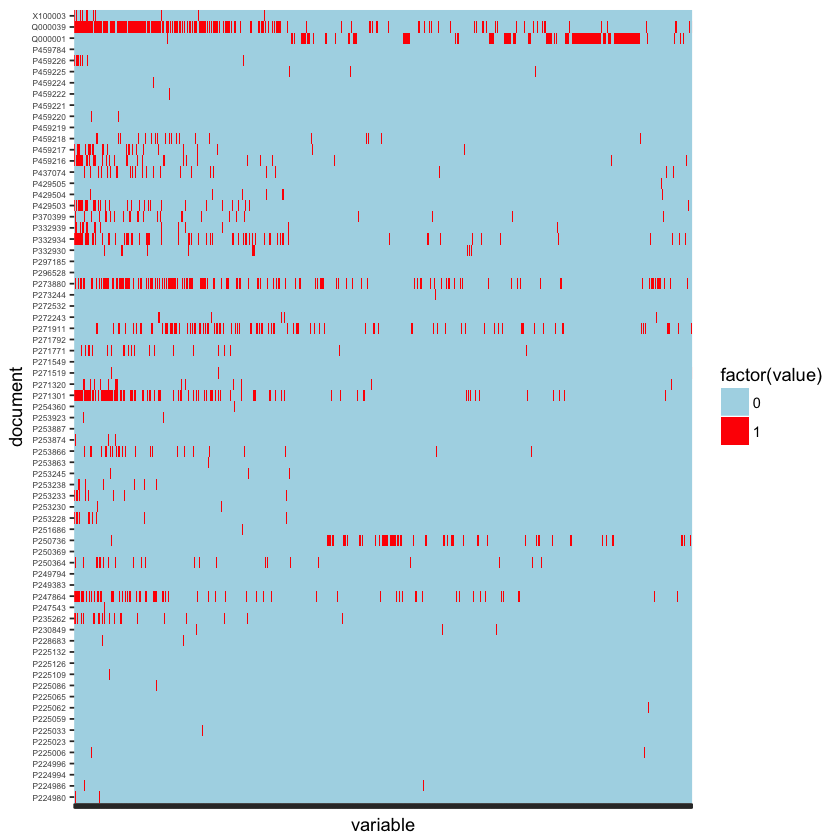

In [21]:
# http://stackoverflow.com/questions/10397183/heat-map-of-binary-data-using-r-or-python

q = qplot(data = melted_dtm_df, x=variable, y=document, fill=factor(value),
     geom="tile")+scale_fill_manual(values=c("0"="lightblue", "1"="red")) +
theme(axis.text.x=element_blank(), axis.text.y = element_text(size = 5))

suppressWarnings(print(q))

## Grouping Documents by Entry Similarity  
We can use hierarchical clustering with our presence/absence matrix to uncover groups of similar documents. Ideally, we can benchmark these clusters' accuracy in uncovering geographically or chronologically related documents by looking at metadata, but for this collection the metadata may be too sparse to do that benchmarking.  

In either case, we can establish a workflow for doing hierarchical clustering and apply that to other datasets with better provenance information to test for cluster utility.  

## Adding provenience by using ORACC metadata

In [22]:
# Bring in metadata
metadata = read.csv("../data/metadata/dcclt_cat.csv")
metadata$document = metadata$X
metadata$X = NULL
head(metadata)

designation,period,provenience,museum_no,document
"W 06435,a",Uruk III,Uruk,VAT 01533,P000001
"W 06435,b",Uruk III,Uruk,VAT 15263,P000002
"W 09123,d",Uruk IV,Uruk,VAT 15253,P000003
"W 09169,d",Uruk IV,Uruk,VAT 15168,P000004
"W 09206,k",Uruk IV,Uruk,VAT 15153,P000005
"W 09656,h1",Uruk IV,Uruk,VAT 15003,P000006


In [23]:
# Drop metadata for documents not in this dataset
docs = unique(rownames(dtm_df))
metadata = metadata[which(metadata$document %in% docs),]
nrow(metadata)

[1] 71

In [26]:
#remove document column
dtm_df$document = NULL

clusters <- hclust(dist(dtm_df))

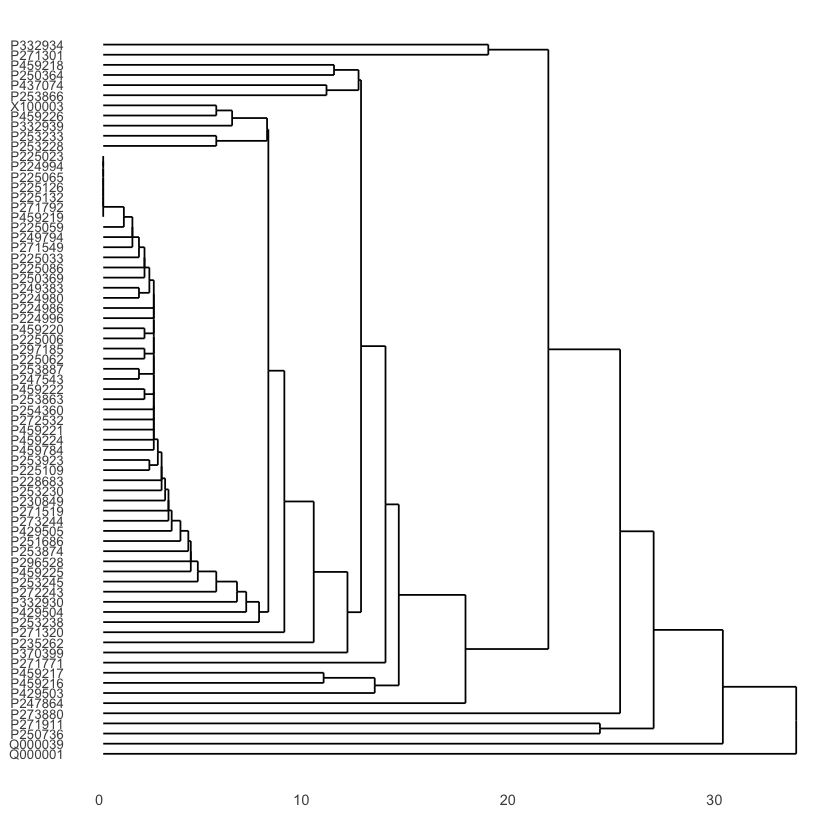

In [27]:
ggdendrogram(clusters, rotate = TRUE) + theme(axis.text.y = element_text(size = 8))

[1] 10

 [1] ""          "Emar"      "Hattusa"   "Ibn Hani"  "Isin"      "Nippur"   
 [7] "Šaduppum"  "Shaduppum" "Ugarit"    "uncertain"


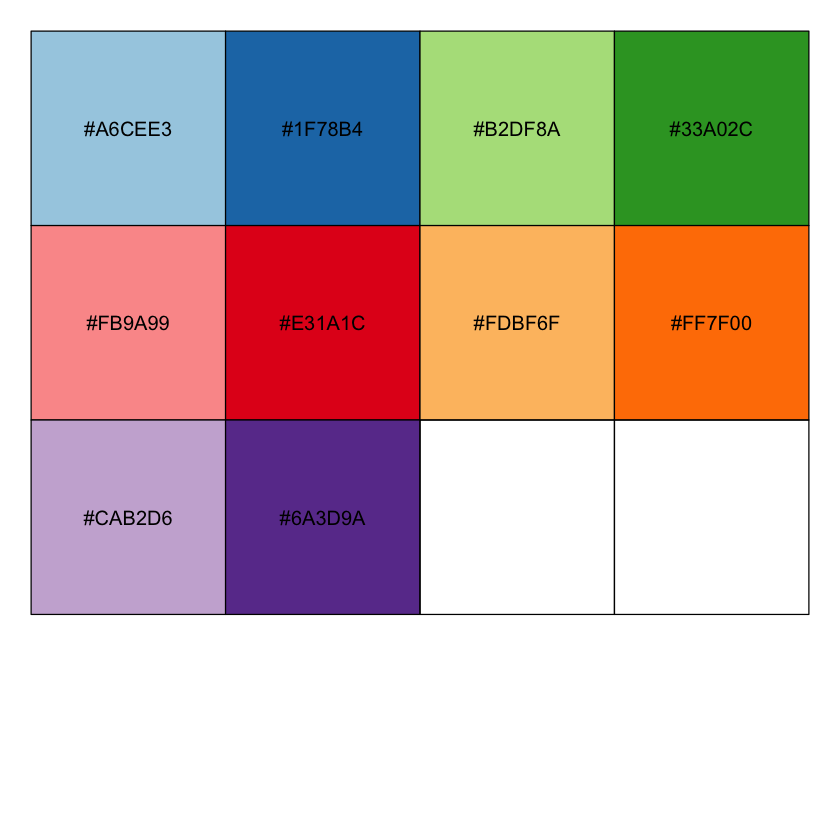

In [28]:
# Add colors to dendrogram by provenance
numColors = length(levels(factor(metadata$provenience)))
numColors
myPalette = brewer_pal(palette = "Paired")(numColors)
names(myPalette) = levels(factor(metadata$provenience))
print(names(myPalette))
show_col(myPalette)

In [29]:
dtm_df$document = rownames(dtm_df)
dtm_df = merge(dtm_df, metadata, by = "document")

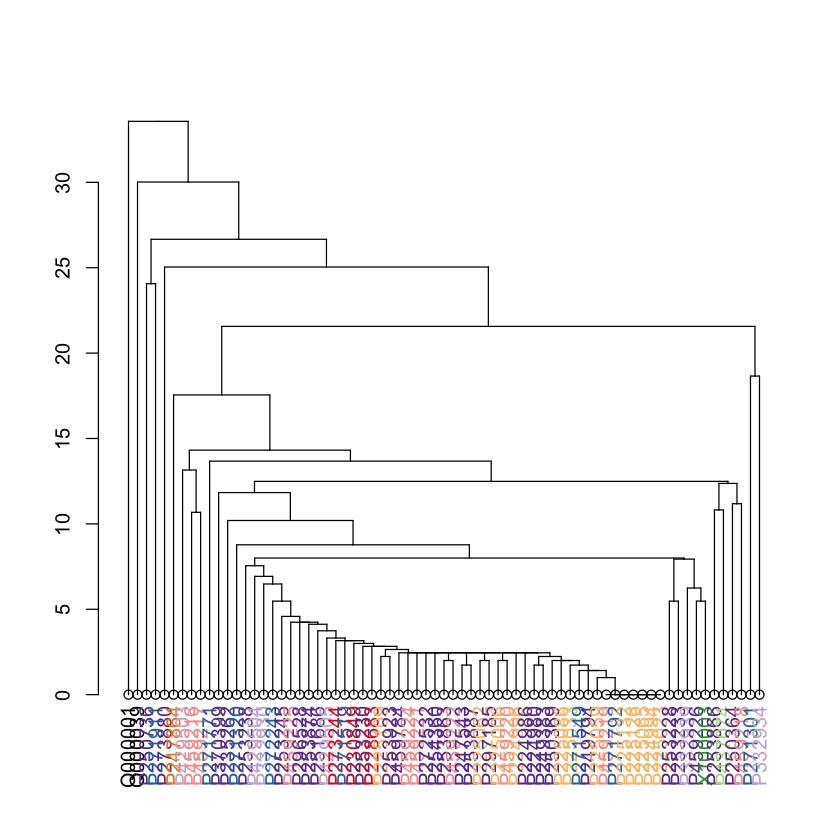

In [30]:
labelCol = function(x) {
  if (is.leaf(x)) {
    # fetch label
    label = attr(x, "label")
    # print(label)
    group = metadata[which(metadata$document == label),"provenience"]
    group_col = unname(myPalette[as.character(group)])
#    attr(x, "nodePar") = list(lab.col = ifelse(label %in% c("A", "B"), "red", "blue"))
    attr(x, "nodePar") = list(lab.col = group_col)
  }
  return(x)
}

## apply labelCol on all nodes of the dendrogram
plot(dendrapply(as.dendrogram(clusters), labelCol))